University of Stirling<br>
Computing Science and Mathematics<br>
#### CSCU9YE - Artificial Intelligence<p>   
## Assignment: Organising a Colour Palette 
This notetbook offers some auxiliary code to support your programming assignment.
    
Group 4: 2615649, 2622287, 2613922  
    

### For Task 3, we have implemented both Iterated Local Search and a Greedy Search Heuristic. Both are included in this notebook under the appropriate headings. A brief comparison of both methods are at the bottom of the notebook. 

### Reading the data file 

In [2]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

#### Read and explore the data file: either the 10, 100, or 500 colours dataset

The colorus are stored in a list, where each element of the list is a numpy array of dimension 3. That is arrays of 3 real numbers where the real numbers indicate the R,G, and B values of the colour (RGB colour model). 

In [3]:
ncolors, colors = read_data("col500.txt")

print(f'Number of colours: {ncolors}')
print("First 5 colours:")
print(colors[0:5,  :])

Number of colours: 496
First 5 colours:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]


### Plotting a sequence of colours

The function <b>plot_colors()</b> displaysthe colours from the color list *col_list* the order given by the *col_order* list. 

*col_list* and *col_order* need to be of the same length. The *ratio* parameter indicates height/width proportion of each bar of colour in the plot.

In [4]:
import matplotlib.pyplot as plt

# Dsiplay the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colors(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Examples of ploting a colour ordering

Let us see how to call the plot function, using the original order in which the colours appear in the data file, and another randomised order.

In [5]:
import random as rnd

# Plot all the colors in the order they are listd in the file
order1 = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
plot_colors(colors, order1)    #  You will notice that colors are not ordered in the file

# Function to generate a random solution (random ordering)  - we can generate a random ordering of the list by using
# the shuffle function from the random library
def random_sol(ncolors):
    sol = list(range(ncolors))   # list of consequtive numbers from 0 to ncolors
    # Shuffle the elements in the list randomly. Shuffles in place and doesn’t retunr a value
    rnd.shuffle(sol)   
    return sol


### Evaluation function to determine the quality of a given ordering of colours

When solving the problem using optimisation heuristics, we need an evaluation function to measure the quality of a sulution. The problem is formulated as a minimisation  problem. We want to minimise the pair-wise distance between consequtive colours in the ordering. 

This function computes the quality of given ordering of colours. The smaller the evaluation function the better, as this is is formulated as a minimisation problem

In [6]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

# Solution Implementations

## Iterated local search implementation

#### Swap implementation

The first mutation operator we implementated is the random_swap method. This swaps two random positions in the array and returns this swapped array.

In [7]:
def random_swap(solution):
    # take copy of the solution passed in
    swap_solution = solution[:]

    # generate two random positions in the array
    ran_position1 = rnd.randint(0, len(swap_solution) - 1)
    ran_position2 = rnd.randint(0, len(swap_solution) - 1)

    # If random positions are the same then change ran_position2
    while ran_position1 == ran_position2:
        ran_position2 = rnd.randint(0, len(swap_solution) - 1)

    # store positions being swapped in temp variables
    swap_val1 = swap_solution[ran_position1]
    swap_val2 = swap_solution[ran_position2]

    # complete swap by swapping values at the random positions
    swap_solution[ran_position1] = swap_val2
    swap_solution[ran_position2] = swap_val1

    return swap_solution  # return the random swap solution

#### Inversion implementation

The second mutation operator we implemented is the random_inverse method. This reverses the ordering between two randomly selected points and returns the partially inversed array. 

In [8]:
# inverse function, inverts values between two positions in given array of colour order
# input: solution, ordering of colours
# output: inverse_solution, inverted values between two points in array
def random_inverse(solution):
    # take copy of the solution passed in
    inverse_solution = solution[:]

    # generate two random positions in the array
    ran_position1 = rnd.randint(0, len(inverse_solution) - 1)
    ran_position2 = rnd.randint(0, len(inverse_solution) - 1)

    # If random positions are the same then change ran_position2
    while ran_position1 == ran_position2:
        ran_position2 = rnd.randint(0, len(inverse_solution) - 1)

    # Order the random positions so ran_position1 is smaller than ran_position2
    if ran_position1 > ran_position2:
        placeholder = ran_position1
        ran_position1 = ran_position2
        ran_position2 = placeholder

    # Take the section that we want to inverse
    inverse_selection = inverse_solution[ran_position1:ran_position2]
    # Reverse all the indexes in the section we want to inverse
    inverse_selection.reverse()

    # Put solution back together
    # Get the original section at the start of the solution
    section_before_rnd1 = inverse_solution[0:ran_position1]
    # Get the section at the end of the solution
    section_after_rnd2 = inverse_solution[ran_position2:len(inverse_solution)]
    # Add the start section to the solution
    inverse_solution = section_before_rnd1
    # Add the reversed section to the solution
    inverse_solution.extend(inverse_selection)
    # Finally add the end section to the solution
    inverse_solution.extend(section_after_rnd2)

    return inverse_solution

### Hill Climbing Function

This function takes in a solution and performs a random swap of two elements in that solution. Compares the new solution to the best solution and stores the lowest evaluation. This is repeated for hc_iterations passed in.


In [9]:
# hill_climbing function. takes in a solution, performs a random swap of two elements in that solution
# compared the evaluation between both solution and stores the best with the lowest evaluation
# Input: hc_iterations (the number of iterations to run the random swap check) and permutation method e.g. 'swap', 'inversion', 'scramble'
# Output: best_solution, the best solution during hill climbing process
#         improvement_trace, storing the distance at every point an improvement has been made
def hill_climbing(hc_iterations, method_choice, cols, ran_sol):
    hc_improvement_trace = []  # stores distance improvements
    hc_best_solution = ran_sol

    if method_choice == "swap":
        for i in range(hc_iterations):
            best_solution_eval = evaluate(cols, hc_best_solution)
            ran_swap_solution = random_swap(hc_best_solution)
            ran_swap_solution_eval = evaluate(cols, ran_swap_solution)

            if ran_swap_solution_eval < best_solution_eval:
                hc_best_solution = ran_swap_solution[:]
            hc_improvement_trace.append(ran_swap_solution_eval)

    elif method_choice == "inversion":
        for i in range(hc_iterations):
            best_solution_eval = evaluate(cols, hc_best_solution)
            ran_inverse_solution = random_inverse(hc_best_solution)
            ran_inverse_solution_eval = evaluate(cols, ran_inverse_solution)

            if ran_inverse_solution_eval < best_solution_eval:
                hc_best_solution = ran_inverse_solution[:]
                hc_improvement_trace.append(ran_inverse_solution_eval)

    elif method_choice == "scramble":
        for i in range(hc_iterations):
            best_solution_eval = evaluate(cols, hc_best_solution)
            ran_scramble_solution = random_scramble(hc_best_solution)
            ran_scramble_solution_eval = evaluate(cols, ran_scramble_solution)

            if ran_scramble_solution_eval < best_solution_eval:
                hc_best_solution = ran_scramble_solution[:]
                hc_improvement_trace.append(ran_scramble_solution_eval)
    else:
        print("invalid algorithm")
    return hc_best_solution, hc_improvement_trace

### Perturbation function

Performs the specified number of swaps on the given solution and returns the perturbed solution. A perturbation is a more drastic mutation of a solution when compared to a regular mutation. 

In [10]:
# perturbation function. A perturb is a large mutation intended to give a kick to the hill climb to get out of a local minima.
# input: number, the number of swaps/how sever a perturb you would like
#        sol, a solution/colour ordering
# output: the pertubed solution/ordering
def perturb(sol, number):
    perturb_sol = sol[:] # make copy of solution

    for i in range(number): # for the number passed in do
        perturb_sol = random_swap(perturb_sol) # perform a swap of two random positions

    return perturb_sol

### Iterated Local Search function

The Iterated Local Search function calls the hill climbing function and stores this as the best solution. A perturbation is then applied to this solution. A perturbation is a more drastic change that consists of several swaps in the solution rather than just one like usual. The intention of this is the give a 'kick' to the hill climbing solution in order to get it out of a local minima in order to get closer to the global minimum. 


In [11]:
# iterated local search function. runs hill climbing for passed in interations but applies a perturbation which is a larger change so the normal mutation to attempt
# to kick a solution out of local minima
# Inputs: ils_iterations, the number of iterations to repeat the perturbation process
#        hc iterations, the number of iterations to run in the hill climb method. aka the number of different colour orderes to try
#        method_choice, the mutation method being swap, inversion or scramble
#        cols, the list of colours from the selected file
# Output: mhc_best_solution, the colours ordering with the best evaluation value
def ils(ils_iterations, hc_iterations, method_choice, cols, pert_num):
    ils_trace = []
    ran_sol = random_sol(len(cols))

    ils_best_solution, hc_improve_trace = hill_climbing(hc_iterations, method_choice, cols, ran_sol)  # call hill climbing function for given iterations and method
    mhc_best_solution_eval = evaluate(cols, ils_best_solution)  # evaluate the given solution
    ils_trace.append(mhc_best_solution_eval)
    for i in range(ils_iterations):  # for mhc repetitions do...

        perturb_order = perturb(ils_best_solution, pert_num)

        current_solution, hc_improve_trace = hill_climbing(hc_iterations, method_choice, cols, perturb_order)  # call hill climbing function for given iterations and method
        current_solution_eval = evaluate(cols, current_solution)  # evaluate the given solution

        if current_solution_eval < mhc_best_solution_eval:  # if new solution is better than the currnet best solution then
            ils_best_solution = current_solution  # store the current solution as the best solution
            mhc_best_solution_eval = current_solution_eval  # store the current evaluation value as the best value
        ils_trace.append(current_solution_eval)
    return ils_best_solution, ils_trace


## Evaluating the quality of ILS solutions

Let us use the evaluation function to calculate the quality of the orderings returned by the iterated local search function for the 100 colour and 500 colour file.

### 100 colours, ILS

After some experimentation with the number of ils iterations, hill climb iterations and size of perturbation. Ran below is that best combination of values we found. 

Number of colours 100: 96
First 5 colours of 100:
[[0.96645354 0.4407326  0.00749147]
 [0.91097596 0.939269   0.58222757]
 [0.67156348 0.08393823 0.76648093]
 [0.23680978 0.03081402 0.78877272]
 [0.34608897 0.62328148 0.6158157 ]]

Unordered solution 100...


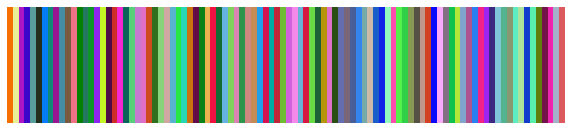

Evaluation of unordered 100: 62.28133261068915
Evaluation of unordered 100: 62.2813

Generating ils 100 solution...


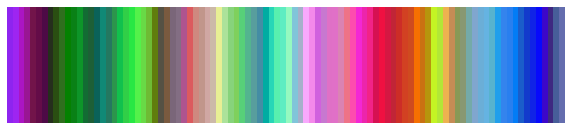


mhc_best100: [15, 82, 2, 8, 92, 32, 17, 5, 56, 25, 12, 33, 14, 36, 53, 20, 7, 13, 40, 76, 68, 29, 67, 52, 47, 91, 70, 10, 58, 75, 79, 95, 41, 71, 27, 62, 1, 88, 26, 38, 21, 85, 4, 9, 45, 30, 90, 87, 65, 84, 94, 74, 49, 48, 22, 55, 23, 39, 11, 66, 19, 93, 81, 44, 35, 51, 46, 18, 72, 24, 0, 31, 54, 16, 77, 34, 42, 69, 86, 61, 78, 50, 37, 28, 43, 60, 80, 6, 63, 89, 64, 73, 3, 83, 59, 57]
Evaluation of order ils 100: 16.122921328406726
Evaluation of order ils 100: 16.1229


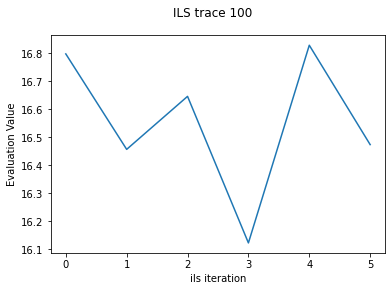

In [12]:
ncolors100, colors100 = read_data("col100.txt")  # pass in 100 colour file to reading function
ncolors500, colors500 = read_data("col500.txt")  # pass in 500 colour file file to reading function

print(f'Number of colours 100: {ncolors100}')
print("First 5 colours of 100:")
print(colors100[0:5, :])  # prints rgb values for first five colours

# Plot all the colors in the order they are listed in the file
order100 = list(range(ncolors100))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered solution 100...')
plot_colors(colors100, order100, 20)  # You will notice that colors are not ordered in the file
unordered_100_eval = evaluate(colors100, order100)
print(f'Evaluation of unordered 100: {unordered_100_eval}')  # Displaying all decimals
print(f'Evaluation of unordered 100: {np.round(unordered_100_eval, 4)}')  # rounding to display only 4 decimals. This is better for display


print('\nGenerating ils 100 solution...')
ils_best100, ils_trace= ils(5, 20000, "inversion", colors100, 2) # ILS run using 5 ils iterations, 20,000 hc iterations, the inversion mutation method and 2 swaps per perturb. this will change 4 positions in the array each ils iteration
plot_colors(colors100, ils_best100, 20)
print('\nmhc_best100:', ils_best100)
ils_100_eval = evaluate(colors100, ils_best100)# evaluate the solution
print(f'Evaluation of order ils 100: {ils_100_eval}')  # Displaying all decimals
print(f'Evaluation of order ils 100: {np.round(ils_100_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

plt.figure()
plt.suptitle('ILS trace 100')
plt.plot(ils_trace)
plt.ylabel("Evaluation Value")
plt.xlabel("ils iteration")
plt.show()

my_best100 = [1, 62, 27, 71, 41, 11, 95, 42, 34, 77, 16, 54, 31, 0, 24, 72, 18, 46, 51, 35, 44, 81, 93, 19, 66, 39, 55, 23, 49, 74,
              48, 22, 94, 84, 78, 50, 37, 28, 43, 60, 80, 6, 63, 89, 64, 73, 3, 15, 82, 2, 8, 79, 58, 75, 86, 69, 47, 52, 67, 29, 68,
              76, 40, 70, 10, 91, 25, 56, 5, 17, 32, 92, 83, 59, 57, 9, 4, 61, 85, 21, 38, 26, 88, 65, 87, 90, 30, 45, 7, 13, 20, 53, 36, 14, 33, 12] # 15.9079, 3 20000 2

### 500 colours ILS


Unordered solution 500...


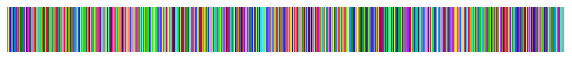

Evaluation of unordered 500: 325.1667419062415
Evaluation of unordered 500: 325.1667

Generating ils 500 solution...


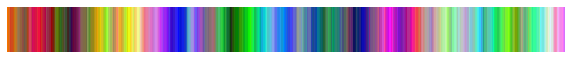


ils_best500: [0, 423, 363, 72, 24, 294, 31, 98, 243, 282, 474, 368, 329, 217, 325, 183, 10, 158, 376, 444, 300, 255, 442, 44, 245, 410, 51, 137, 35, 358, 18, 46, 209, 141, 332, 239, 471, 156, 388, 195, 460, 264, 435, 187, 91, 389, 222, 25, 462, 416, 220, 70, 258, 453, 343, 338, 148, 102, 17, 268, 32, 92, 336, 147, 242, 105, 467, 190, 464, 455, 470, 69, 304, 119, 116, 440, 400, 54, 473, 205, 99, 328, 173, 288, 237, 434, 317, 429, 189, 219, 415, 113, 289, 312, 395, 185, 42, 298, 108, 34, 397, 412, 310, 170, 175, 77, 16, 254, 290, 252, 302, 138, 377, 399, 404, 344, 437, 1, 461, 106, 162, 299, 11, 100, 401, 39, 111, 55, 23, 402, 22, 387, 472, 151, 48, 199, 355, 438, 233, 247, 82, 15, 318, 327, 230, 153, 3, 468, 308, 246, 331, 218, 73, 315, 203, 441, 64, 407, 89, 63, 369, 28, 50, 78, 176, 366, 394, 232, 127, 356, 323, 193, 192, 204, 240, 295, 133, 353, 75, 58, 139, 249, 418, 489, 234, 436, 361, 277, 379, 360, 68, 152, 348, 14, 96, 307, 36, 171, 430, 5, 56, 357, 291, 314, 12, 33, 159, 484, 

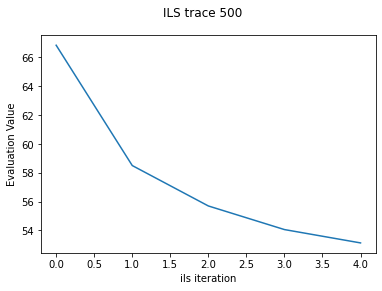

In [14]:
order500 = list(range(ncolors500))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered solution 500...')
plot_colors(colors500, order500, 40)  # You will notice that colors are not ordered in the file
unordered_500_eval = evaluate(colors500, order500)# evaluate the solution
print(f'Evaluation of unordered 500: {unordered_500_eval}')  # Displaying all decimals
print(f'Evaluation of unordered 500: {np.round(unordered_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display


print('\nGenerating ils 500 solution...')
ils_best500, ils_500trace= ils(4, 100000, "inversion", colors500, 3)  # ILS run using 4 ils iterations, 100,000 hc iterations, the inversion mutation method and 3 swaps per perturb. this will change 6 positions in the array each ils iteration
plot_colors(colors100, ils_best100, 20)
plot_colors(colors500, ils_best500, 40)
print('\nils_best500:', ils_best500)
ils_500_eval= evaluate(colors500, ils_best500)# evaluate the solution
print(f'Evaluation of order ils 500: {ils_500_eval}')  # Displaying all decimals
print(f'Evaluation of order ils 500: {np.round(ils_500_eval, 4)}')  # rounding to display only 4 decimals. This is better for display

my_best500 = [0, 423, 363, 72, 24, 294, 31, 98, 243, 282, 474, 368, 329, 217, 325, 183, 10, 158, 376, 444, 300, 255, 442, 44, 245, 410, 51, 137, 35, 358, 18, 46, 209, 141, 332, 239,
              471, 156, 388, 195, 460, 264, 435, 187, 91, 389, 222, 25, 462, 416, 220, 70, 258, 453, 343, 338, 148, 102, 17, 268, 32, 92, 336, 147, 242, 105, 467, 190, 464, 455, 470,
              69, 304, 119, 116, 440, 400, 54, 473, 205, 99, 328, 173, 288, 237, 434, 317, 429, 189, 219, 415, 113, 289, 312, 395, 185, 42, 298, 108, 34, 397, 412, 310, 170, 175, 77,
              16, 254, 290, 252, 302, 138, 377, 399, 404, 344, 437, 1, 461, 106, 162, 299, 11, 100, 401, 39, 111, 55, 23, 402, 22, 387, 472, 151, 48, 199, 355, 438, 233, 247, 82, 15, 
              318, 327, 230, 153, 3, 468, 308, 246, 331, 218, 73, 315, 203, 441, 64, 407, 89, 63, 369, 28, 50, 78, 176, 366, 394, 232, 127, 356, 323, 193, 192, 204, 240, 295, 133, 353,
              75, 58, 139, 249, 418, 489, 234, 436, 361, 277, 379, 360, 68, 152, 348, 14, 96, 307, 36, 171, 430, 5, 56, 357, 291, 314, 12, 33, 159, 484, 262, 349, 449, 165, 428, 420, 
              174, 322, 129, 132, 29, 125, 76, 352, 364, 281, 272, 45, 383, 114, 459, 184, 492, 475, 146, 408, 451, 37, 191, 326, 236, 371, 60, 80, 354, 43, 305, 486, 6, 403, 168, 266,
              452, 109, 136, 134, 391, 292, 101, 244, 483, 417, 186, 373, 61, 4, 263, 313, 9, 207, 57, 160, 324, 346, 274, 380, 362, 179, 419, 393, 161, 341, 20, 53, 155, 177, 458, 487,
              123, 40, 13, 284, 200, 7, 316, 485, 216, 215, 59, 121, 439, 334, 231, 345, 433, 206, 479, 167, 351, 392, 270, 208, 456, 319, 365, 253, 466, 224, 347, 126, 477, 374, 83, 287, 
              333, 213, 306, 297, 457, 164, 406, 79, 443, 426, 117, 144, 425, 66, 93, 115, 480, 478, 251, 384, 19, 396, 276, 2, 491, 469, 211, 454, 320, 447, 427, 196, 8, 172, 197, 370,
              490, 286, 103, 81, 411, 257, 275, 248, 482, 95, 446, 104, 41, 71, 181, 157, 494, 214, 269, 381, 271, 450, 27, 62, 293, 350, 445, 154, 88, 131, 405, 143, 283, 221, 182, 112,
              26, 149, 229, 481, 65, 169, 241, 488, 273, 409, 163, 309, 212, 465, 385, 226, 94, 367, 84, 390, 140, 145, 279, 87, 227, 150, 225, 422, 280, 210, 335, 259, 85, 339, 223, 
              198, 386, 30, 413, 194, 378, 188, 337, 342, 256, 267, 67, 321, 52, 235, 301, 122, 421, 432, 476, 47, 424, 201, 278, 414, 124, 431, 86, 142, 265, 493, 135, 178, 21, 38, 238,
              228, 340, 110, 375, 97, 261, 118, 90, 296, 448, 120, 107, 130, 398, 202, 359, 382, 311, 495, 303, 330, 250, 260, 166, 128, 74, 180, 49, 372, 285, 463]

# 53.1299 4, 100000 3

plt.figure()
plt.suptitle('ILS trace 500')
plt.plot(ils_500trace)
plt.ylabel("Evaluation Value")
plt.xlabel("ils iteration")
plt.show()

## Analysis of Iterated Local Search solutions

Above you can see the output from the Iterated Local Search function and also the graphs plotting the results after each run of hill climb. 

For 100 colours, the function is able to achieve an evaluation of around 16.2 and a very aesthetically pleasing plot. 
Also for 500 colours, the function is able to produce an evaluation of around 53/54 and also a very aesthetically pleasing plot.

So comparing hill climb and iterated local search, we could run the hill climb algorithm for 100,000  but in many runs it can get stuck in a local minima around 16.7. Iterated local search helps get out the local minima by applying the perturbation and continuing the hill climb as it typically achieves around 16.2

<br>

# Greedy Search Heuristic implementation

### Greedy constructive heuristic function

This greedy constructive heuristic function takes in a list of colours, and generates a random index as the starting point. It then searches the array for the closest colour match to the starting colour using the euclid function and adds the index of this colour to the next position in the greedy ordering array(after checking it is not already in there or itself).  Then process then repeats with this newly entered colour until the solution is complete. It is called 'greedy' as it always chooses the next best option for the next position in the solution.



In [24]:
# greedy constructive heuristic function. takes in a list of colours, selects a random point for the beginning of a greedy ordering array
# then searches the list of colours to find the closest colour match (shortest euclidean distance) to that colour, checking it is not already in the sorted array
# This colours index is appended in the greedy_ordering array, the process repeats until we are left with the greedy ordering
# input: original_colour_values_array, array of colours stored as RGB values
# output: greedy_ordering, the greedy ordering of colours
def greedy(original_colour_values_array):

    greedy_ordering = [] # initialise empty array to store greedy ordering
    greedy_ordering.append(rnd.randint(0, len(original_colour_values_array)-1)) # select a random start point in the array
    
    for i in range(len(original_colour_values_array) - 1): # for the length of the colour array -1 times do...(one less as we cant check to distance from the last colour to nothing!)(this loops adds the index of the closest colour found into the solution array)
        current_colour_index = greedy_ordering[i] # set the current colour index to the current position in the greedy ordering array
        dist_to_closest_col = 1000 # distance greater than any possible distance
        closest_colour_index = 0 # init variable to store the closest colour index

        for j in range(len(original_colour_values_array)): # for the length of the colours array do...(looks through all colours and finds the closest one)
            current_colour = original_colour_values_array[current_colour_index] # get the RGB values of the current colour

            if j != current_colour_index and j not in greedy_ordering: # check j is not  the current colour index and has not been sorted already
                next_colour = original_colour_values_array[j] # set the next colour to be the colour as position j in the colour array
                
                dist_to_next_col = euclid(current_colour, next_colour) # get the distance between the current colour and the next colour

                if dist_to_next_col < dist_to_closest_col: # if this distance is smaller that the current smallest
                    closest_colour_index = j # store position j as the closest colour index
                    dist_to_closest_col = dist_to_next_col # and store this distance as the new closest distance
                    
        greedy_ordering.append(closest_colour_index) # append the closest colour that was found. (process will be repeated on this colour)

    return greedy_ordering




## Evaluating the quality of Greedy solutions

Using the evaluation function we can 'score' each solution generated. The lower the value the better. We also visualise the colour orderings using the plot_colours function. Both of these evaluation metrics are displayed after running the segment below.

### 100 colours and 500 colours



Unordered colours from file 100...


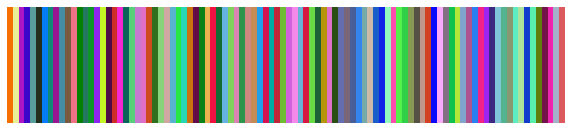

Evaluation of unordered 100: 62.28133261068915
Evaluation of unordered 100: 62.2813

Generating greedy solution 100...


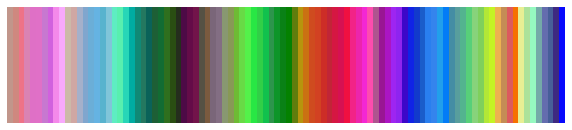

Evaluation of order 100, greedy: 17.393170020263707
Evaluation of order 100, greedy: 17.3932
Greedy sol 100 [71, 41, 11, 39, 55, 23, 22, 48, 49, 74, 62, 27, 94, 78, 50, 37, 28, 84, 87, 90, 30, 45, 7, 13, 20, 53, 36, 25, 56, 5, 17, 32, 92, 70, 10, 58, 75, 86, 69, 47, 52, 67, 29, 68, 76, 40, 14, 33, 12, 91, 54, 31, 24, 72, 18, 46, 51, 44, 35, 81, 93, 19, 66, 79, 8, 2, 82, 15, 3, 64, 89, 63, 80, 60, 43, 6, 9, 4, 85, 21, 26, 38, 77, 16, 34, 42, 95, 0, 1, 88, 65, 61, 57, 59, 83, 73]

Unordered colours from file 500...


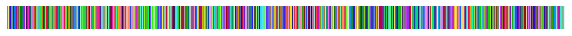

Evaluation of unordered 500: 325.1667419062415
Evaluation of unordered 500: 325.1667

Generating greedy solution 500...


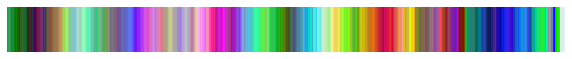

Evaluation of order 500, greedy: 53.75641004715497
Evaluation of order 500, greedy: 53.7564
Greedy sol 500 [458, 123, 487, 40, 307, 14, 33, 314, 12, 291, 357, 56, 462, 25, 155, 53, 36, 171, 430, 5, 453, 343, 338, 148, 102, 17, 32, 92, 336, 147, 206, 167, 351, 392, 479, 70, 183, 10, 325, 158, 329, 368, 474, 234, 282, 395, 185, 42, 312, 289, 113, 415, 182, 221, 112, 26, 149, 145, 140, 390, 84, 367, 488, 273, 409, 241, 169, 481, 65, 229, 296, 90, 118, 87, 279, 223, 339, 85, 259, 335, 379, 21, 178, 493, 135, 361, 277, 431, 304, 69, 86, 436, 133, 353, 75, 58, 297, 457, 306, 213, 240, 295, 57, 160, 207, 101, 292, 391, 236, 371, 232, 127, 134, 230, 327, 318, 15, 82, 247, 233, 438, 355, 199, 48, 144, 425, 402, 55, 23, 151, 472, 387, 22, 111, 39, 401, 100, 11, 446, 41, 71, 265, 142, 350, 445, 154, 62, 293, 181, 157, 494, 214, 269, 381, 366, 176, 385, 212, 309, 163, 94, 226, 465, 450, 271, 104, 27, 106, 461, 330, 128, 74, 180, 49, 372, 285, 463, 250, 166, 260, 66, 93, 103, 81, 411, 286, 490, 276

In [25]:
ncolors100, colors100 = read_data("col100.txt")  # pass in 100 file to reading function
ncolors500, colors500 = read_data("col500.txt")  # pass in 500 file to reading function

# Plot all the colors in the order they are listed in the file
order100 = list(range(ncolors100))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered colours from file 100...')
plot_colors(colors100, order100, 20)  # You will notice that colors are not ordered in the file
unordered_evaluation100 = evaluate(colors100, order100)
print(f'Evaluation of unordered 100: {unordered_evaluation100}')  # Displaying all decimals
print(f'Evaluation of unordered 100: {np.round(unordered_evaluation100, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating greedy solution 100...')
greedy_sol100 = greedy(colors100)
plot_colors(colors100, greedy_sol100, 20)
greedy_evaluation100 = evaluate(colors100, greedy_sol100)
print(f'Evaluation of order 100, greedy: {greedy_evaluation100}')  # Displaying all decimals
print(f'Evaluation of order 100, greedy: {np.round(greedy_evaluation100, 4)}')  # rounding to display only 4 decimals. This is better for display
print('Greedy sol 100', greedy_sol100)

my_best100 = [71, 41, 11, 39, 55, 23, 22, 48, 49, 74, 62, 27, 94, 78, 50, 37, 28, 84, 87, 90, 30, 45, 7, 13, 20, 53, 36, 25, 56, 5, 17, 32, 92, 70, 10, 58, 75, 86, 69, 47, 52, 67, 29, 68, 76, 40, 14, 33, 12, 91, 54, 31, 24, 72, 18, 46, 51, 44, 
              35, 81, 93, 19, 66, 79, 8, 2, 82, 15, 3, 64, 89, 63, 80, 60, 43, 6, 9, 4, 85, 21, 26, 38, 77, 16, 34, 42, 95, 0, 1, 88, 65, 61, 57, 59, 83, 73] # 17.39

########################################################################################################################################################################################################################################

# Plot all the colors in the order they are listed in the file
order500 = list(range(ncolors500))  # list of consecutive numbers from 0 to ncolors
print('\nUnordered colours from file 500...')
plot_colors(colors500, order500, 20)  # You will notice that colors are not ordered in the file
unordered_evaluation500 = evaluate(colors500, order500)
print(f'Evaluation of unordered 500: {unordered_evaluation500}')  # Displaying all decimals
print(f'Evaluation of unordered 500: {np.round(unordered_evaluation500, 4)}')  # rounding to display only 4 decimals. This is better for display

print('\nGenerating greedy solution 500...')
greedy_sol500 = greedy(colors500)
plot_colors(colors500, greedy_sol500, 40)
greedy_evaluation500 = evaluate(colors500, greedy_sol500)
print(f'Evaluation of order 500, greedy: {greedy_evaluation500}')  # Displaying all decimals
print(f'Evaluation of order 500, greedy: {np.round(greedy_evaluation500, 4)}')  # rounding to display only 4 decimals. This is better for display
print('Greedy sol 500', greedy_sol500)

my_best500 = [221, 182, 112, 26, 149, 145, 140, 390, 84, 367, 488, 273, 409, 241, 169, 481, 65, 229, 296, 90, 118, 87, 279, 223, 339, 85, 259, 335, 379, 21, 178, 493, 135, 361, 277, 487, 123, 40, 307, 14, 33, 314, 12,
291, 357, 56, 462, 25, 155, 53, 36, 171, 430, 5, 453, 343, 338, 148, 102, 17, 32, 92, 336, 147, 206, 167, 351, 392, 479, 70, 183, 10, 325, 158, 329, 368, 474, 234, 282, 395, 185, 42, 312, 289, 113, 415, 77, 175, 16,
219, 189, 235, 301, 421, 122, 429, 317, 424, 47, 124, 476, 432, 52, 321, 67, 267, 256, 342, 68, 152, 360, 337, 76, 348, 165, 449, 349, 262, 484, 159, 91, 389, 222, 416, 220, 258, 177, 458, 316, 485, 216, 215, 13, 341,
20, 161, 393, 419, 7, 284, 200, 96, 119, 187, 470, 464, 455, 190, 467, 105, 433, 345, 58, 297, 457, 306, 213, 240, 295, 57, 160, 207, 101, 292, 391, 236, 371, 232, 127, 134, 230, 327, 318, 15, 82, 247, 233, 438, 355, 
199, 48, 144, 425, 402, 55, 23, 151, 472, 387, 22, 111, 39, 401, 100, 11, 446, 41, 71, 265, 142, 350, 445, 154, 62, 293, 181, 157, 494, 214, 269, 381, 366, 176, 385, 212, 309, 163, 94, 226, 465, 450, 271, 104, 27, 106,
461, 330, 128, 74, 180, 49, 372, 285, 463, 250, 166, 260, 66, 93, 103, 81, 411, 286, 490, 276, 115, 480, 478, 384, 19, 251, 396, 117, 426, 197, 370, 8, 196, 491, 2, 469, 193, 323, 356, 394, 326, 191, 78, 373, 50, 37,
451, 408, 146, 475, 198, 386, 261, 97, 375, 110, 340, 238, 228, 38, 431, 304, 69, 86, 436, 133, 353, 75, 139, 249, 489, 418, 406, 164, 204, 192, 79, 443, 95, 248, 482, 298, 108, 299, 162, 34, 399, 404, 344, 138, 302,
252, 288, 254, 290, 237, 328, 173, 205, 473, 54, 98, 243, 31, 423, 0, 363, 294, 24, 72, 18, 46, 209, 141, 332, 442, 44, 245, 410, 51, 137, 35, 358, 255, 300, 275, 257, 444, 376, 156, 388, 471, 239, 217, 242, 333, 447,
320, 454, 211, 427, 172, 268, 264, 460, 195, 435, 116, 440, 400, 278, 414, 201, 434, 170, 310, 412, 397, 99, 377, 1, 437, 143, 202, 359, 303, 311, 382, 495, 398, 130, 120, 107, 448, 227, 150, 492, 184, 459, 383, 114, 
43, 305, 486, 6, 403, 266, 168, 63, 452, 109, 136, 246, 331, 218, 64, 315, 441, 203, 407, 89, 324, 380, 362, 346, 274, 319, 365, 208, 270, 253, 466, 83, 374, 287, 439, 334, 231, 121, 59, 313, 9, 263, 4, 369, 28, 422,
280, 30, 272, 364, 281, 194, 378, 188, 29, 132, 125, 352, 210, 45, 413, 225, 354, 80, 60, 244, 186, 417, 483, 61, 88, 131, 405, 283, 129, 322, 174, 420, 428, 456, 179, 347, 126, 477, 3, 153, 308, 468, 73, 224] #52.7711



## Analysing the quality of Greedy solutions

After running, above you should see the orderings and evaluations of the unordered list and greedy constructive hueristic for both 100 and 500 colour files. 

The unordered list has the worst appearance and evaluation. 
Greedy makes a large improvment on the unordered array as it picks a random point in the unordered array, adds this to the solution array as the starting point. The alogirthm then searches the whole list for the closest colour match and puts that in the next position in the solutions array if not already in there. This process repeats until every colour is sorted into the solution array. 

An evaluation of 52.89 for 500 is one of the best values we have got from any algorithm and it is produced around 1 second which is amazing when compared to the near hour timings of the other methods. 



## Comparison of Greedy and Iterated Local Search

We researched and implemented both solutions in order to find which would give the best results, so comparing the output of ILS and Greedy we can see that ILS gives a slightly better output, both in terms of evaluation and colour plot. 

ILS gave us the opportunity to build upon the already existing hill climb implementation. There are only a few subtle differences between ILS and Multi Hill Climb. The benifit of doing ILS over hill cimb alone, as mentioned earlier, is that it helps to prevent the solution getting stuck in a local minima by applying a perturbation. 

The real benefit of a Greedy Search Heuristic is that is runs very quickly compared to other methods like hill climb, ILS etc. It does not promise the best solution but it does provide a good enough solution very quickly.

So when deciding which function to use, if time is more important than the absolute best result possible then use greedy but if you care about getting a high quality solution and have plenty time then the best option would be to run iterated local search with a high number of iterations. 
